In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
from sklearn.datasets import make_blobs

x1, y1 = make_blobs(n_samples=1000, centers=((3,-3),(1,1)), random_state=1)

x1 = x1.dot(np.array([[0.4, 1], [0.7, 0.6]]))
x2, y2 = make_blobs(n_samples=300, centers=1, random_state=1)
x2 = x2 +[6,-3]
x = np.r_[x1, x2]
y = np.r_[y1, y2]

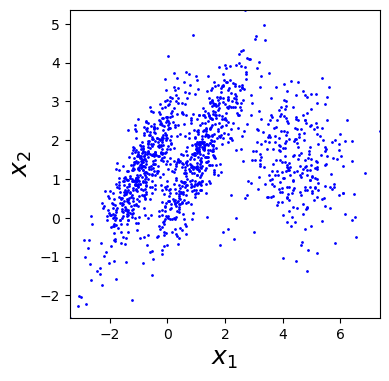

In [6]:
plt.figure(figsize=(4, 4))
plt.scatter(x[:, 0], x[:, 1], c='b', s=1)
plt.xlabel('$x_1$', fontsize=18)
plt.ylabel('$x_2$', fontsize=18)
mins = x.min(axis=0)
maxs = x.max(axis=0)
plt.axis([mins[0], maxs[0], mins[1], maxs[1]])
plt.show()

In [7]:
#GaussianMixture

In [8]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=3, n_init=10, covariance_type='full', random_state=1)
gm.fit(x)

GaussianMixture(n_components=3, n_init=10, random_state=1)

In [9]:
pi = gm.weights_
pi

array([0.38650747, 0.23233747, 0.38115506])

In [10]:
mu = gm.means_
mu

array([[-0.85825108,  1.26229706],
       [ 4.37283221,  1.48414028],
       [ 1.13245359,  1.65188929]])

In [11]:
Sigma = gm.covariances_
Sigma

array([[[ 0.59004708,  0.72708102],
        [ 0.72708102,  1.22730296]],

       [[ 0.97765035, -0.08571483],
        [-0.08571483,  1.01359424]],

       [[ 0.65972267,  0.85201622],
        [ 0.85201622,  1.45487237]]])

In [12]:
#Log L

In [13]:
gm.score_samples(x)

array([-2.72456154, -2.2719355 , -2.1769829 , ..., -4.00439117,
       -3.58332253, -4.59438607])

In [14]:
#Predict(hard)

In [16]:
gm.predict(x)

array([0, 0, 2, ..., 1, 1, 1])

In [17]:
#Predict(soft)

In [18]:
gm.predict_proba(x)

array([[9.89013775e-01, 1.58772476e-05, 1.09703480e-02],
       [9.99142985e-01, 5.36389838e-06, 8.51650836e-04],
       [1.72921921e-04, 2.42484819e-03, 9.97402230e-01],
       ...,
       [9.20779376e-46, 1.00000000e+00, 5.85225346e-22],
       [5.83866954e-24, 9.99999950e-01, 4.98335552e-08],
       [2.96547926e-46, 1.00000000e+00, 2.41443835e-22]])

In [19]:
#Plot

In [26]:
def plotGaussianMixture(clusterer, x):
    mins = x.min(axis=0)
    maxs = x.max(axis=0)
    x1s = np.linspace(mins[0], maxs[0], 1000)
    x2s = np.linspace(mins[1], maxs[1], 1000)
    x1, x2 = np.meshgrid(x1s, x2s)
    xNew = np.c_[x1.ravel(), x2.ravel()]
    z = -clusterer.score_samples(xNew).reshape(x1.shape)
    yPred = clusterer.predict(xNew).reshape(x1.shape)
    
    plt.contourf(x1, x2, yPred, alpha=.2)
    plt.contour(x1, x2, yPred, linewidths=1, colors='r', linestyles='dashed')
    plt.contour(x1, x2, z, levels=np.logspace(0, 2, 12), linewidths=1, colors='g')
    plt.plot(x[:,0], x[:,1], 'k.', markersize=2)
    plt.scatter(mu[:, 0], mu[:, 1], marker='x', s=5, linewidths=10, color='r', alpha=1, zorder=3)
    
    plt.xlabel('$x_1$', fontsize=18)
    plt.ylabel('$x_2$', fontsize=18)
    plt.axis([mins[0], maxs[0], mins[1], maxs[1]])

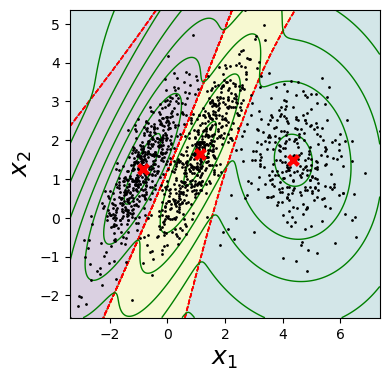

In [27]:
plt.figure(figsize=(4, 4))
plotGaussianMixture(gm, x)
plt.show()

In [28]:
#Anomaly detection

In [31]:
densities = gm.score_samples(x)
densityThreshold = np.percentile(densities, 4)
anom = x[densities < densityThreshold]

In [32]:
#Model selection

In [33]:
gm.bic(x)

8615.381297206244

In [34]:
gm.aic(x)

8527.4892649676

In [35]:
gmsK = [GaussianMixture(n_components=k, n_init=10, random_state=1).fit(x) for k in range(1,10)]

In [36]:
bics = [model.bic(x) for model in gmsK]
aics = [model.aic(x) for model in gmsK]

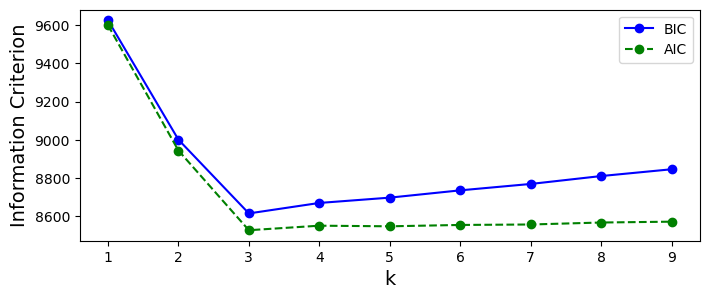

In [37]:
plt.figure(figsize=(8, 3))
plt.plot(range(1, 10), bics, 'bo-', label='BIC')
plt.plot(range(1, 10), aics, 'go--', label='AIC')
plt.xlabel('k', fontsize=14)
plt.ylabel('Information Criterion', fontsize=14)
plt.legend()
plt.show()